In [7]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [39]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [12]:
import requests
from config import weather_api_key

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | ishigaki
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | leo
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | cah ab
City not found. Skipping...
Processing Record 16 of Set 1 | borisoglebskiy
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | benemerito de las americas
Processing Record 20 of Set 1 | katangli
Processing Reco

City not found. Skipping...
Processing Record 40 of Set 4 | martapura
Processing Record 41 of Set 4 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 42 of Set 4 | arlit
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | hobyo
Processing Record 46 of Set 4 | haibowan
City not found. Skipping...
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | vilyuysk
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | qaqortoq
Processing Record 1 of Set 5 | mezen
Processing Record 2 of Set 5 | porto novo
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | ust-tsilma
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | yumen
Processing Record 7 of Set 5 | brae
Processing Record 8 of Set 5 | bangkal
Processing Record 9 of Set 5 | jining
Processing Record 10 of Set 5 | gat
Processing Record 11 of Set 5 | kruisfontein
Processing R

Processing Record 27 of Set 8 | hirara
Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | stolin
Processing Record 30 of Set 8 | kusk
City not found. Skipping...
Processing Record 31 of Set 8 | namibe
Processing Record 32 of Set 8 | motygino
Processing Record 33 of Set 8 | ambon
Processing Record 34 of Set 8 | evensk
Processing Record 35 of Set 8 | frontera
Processing Record 36 of Set 8 | kaitangata
Processing Record 37 of Set 8 | abha
Processing Record 38 of Set 8 | coolum beach
Processing Record 39 of Set 8 | pasni
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | seminole
Processing Record 42 of Set 8 | namyslow
Processing Record 43 of Set 8 | sechura
Processing Record 44 of Set 8 | shelbyville
Processing Record 45 of Set 8 | tateyama
Processing Record 46 of Set 8 | coihaique
Processing Record 47 of Set 8 | nurota
Processing Record 48 of Set 8 | bathsheba
Processing Record 49 of Set 8 | liverpool
Processing Record 50 of Set 8 | christchurch

Processing Record 16 of Set 12 | igarape-miri
City not found. Skipping...
Processing Record 17 of Set 12 | homer
Processing Record 18 of Set 12 | northam
Processing Record 19 of Set 12 | lasa
Processing Record 20 of Set 12 | warqla
City not found. Skipping...
Processing Record 21 of Set 12 | turukhansk
Processing Record 22 of Set 12 | hay river
Processing Record 23 of Set 12 | jesus maria
Processing Record 24 of Set 12 | tongliao
Processing Record 25 of Set 12 | piterka
Processing Record 26 of Set 12 | belem
Processing Record 27 of Set 12 | guanare
Processing Record 28 of Set 12 | arkhara
Processing Record 29 of Set 12 | deh rawud
City not found. Skipping...
Processing Record 30 of Set 12 | itupiranga
Processing Record 31 of Set 12 | kuche
City not found. Skipping...
Processing Record 32 of Set 12 | nelson
Processing Record 33 of Set 12 | chum phae
Processing Record 34 of Set 12 | manaus
Processing Record 35 of Set 12 | haines junction
Processing Record 36 of Set 12 | guiyang
Processin

In [16]:
print(len(city_data))

552


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,66.99,88,20,5.82,ZA,2020-12-23 03:28:11
1,Jamestown,42.10,-79.24,32.00,92,90,4.32,US,2020-12-23 03:28:12
2,Puerto Ayora,-0.74,-90.35,71.01,93,17,6.29,EC,2020-12-23 03:28:12
3,Lavrentiya,65.58,-171.00,24.67,98,100,10.42,RU,2020-12-23 03:28:12
4,Vaini,-21.20,-175.20,84.20,79,75,5.82,TO,2020-12-23 03:28:12
5,Atuona,-9.80,-139.03,78.84,78,72,16.44,PF,2020-12-23 03:28:12
6,Busselton,-33.65,115.33,87.01,40,0,1.99,AU,2020-12-23 03:28:13
7,Albany,42.60,-73.97,35.60,55,40,21.92,US,2020-12-23 03:23:58
8,Severo-Kurilsk,50.68,156.12,21.49,88,94,26.60,RU,2020-12-23 03:28:13
9,Barrow,71.29,-156.79,-9.40,69,1,29.97,US,2020-12-23 03:28:13


In [18]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-12-23 03:28:11,-33.93,18.42,66.99,88,20,5.82
1,Jamestown,US,2020-12-23 03:28:12,42.10,-79.24,32.00,92,90,4.32
2,Puerto Ayora,EC,2020-12-23 03:28:12,-0.74,-90.35,71.01,93,17,6.29
3,Lavrentiya,RU,2020-12-23 03:28:12,65.58,-171.00,24.67,98,100,10.42
4,Vaini,TO,2020-12-23 03:28:12,-21.20,-175.20,84.20,79,75,5.82
5,Atuona,PF,2020-12-23 03:28:12,-9.80,-139.03,78.84,78,72,16.44
6,Busselton,AU,2020-12-23 03:28:13,-33.65,115.33,87.01,40,0,1.99
7,Albany,US,2020-12-23 03:23:58,42.60,-73.97,35.60,55,40,21.92
8,Severo-Kurilsk,RU,2020-12-23 03:28:13,50.68,156.12,21.49,88,94,26.60
9,Barrow,US,2020-12-23 03:28:13,71.29,-156.79,-9.40,69,1,29.97


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

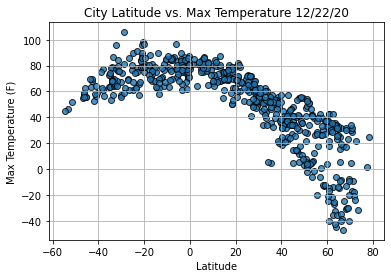

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

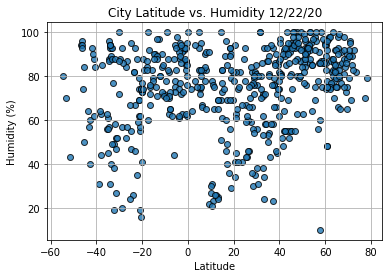

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

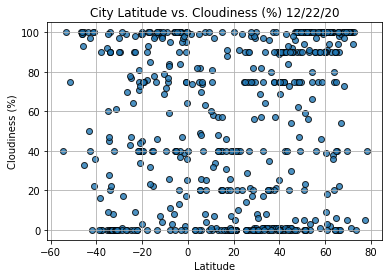

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

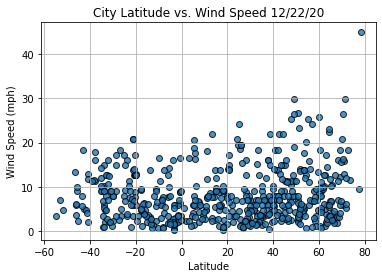

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2020-12-23 03:28:12,42.10,-79.24,32.00,92,90,4.32
3,Lavrentiya,RU,2020-12-23 03:28:12,65.58,-171.00,24.67,98,100,10.42
7,Albany,US,2020-12-23 03:23:58,42.60,-73.97,35.60,55,40,21.92
8,Severo-Kurilsk,RU,2020-12-23 03:28:13,50.68,156.12,21.49,88,94,26.60
9,Barrow,US,2020-12-23 03:28:13,71.29,-156.79,-9.40,69,1,29.97


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

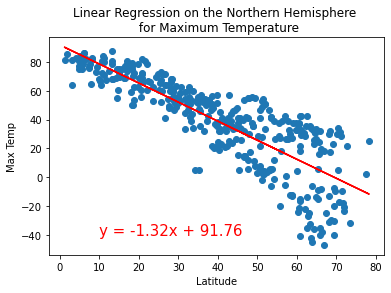

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,-40))

plt.show()

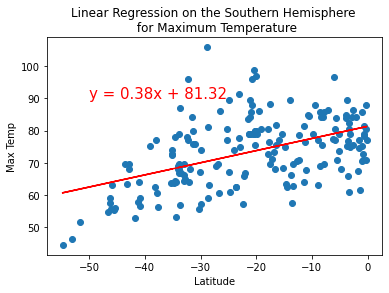

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

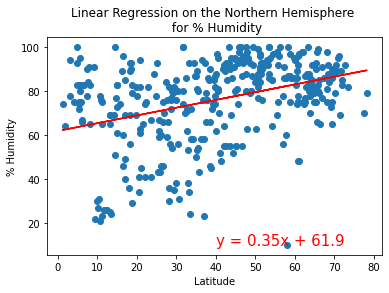

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

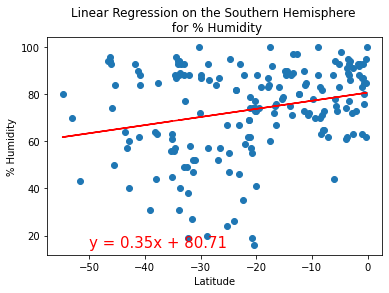

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

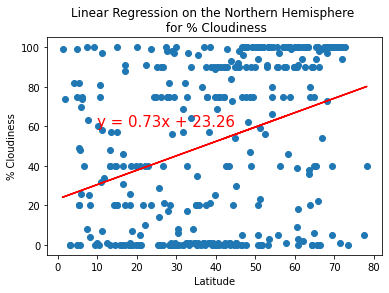

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

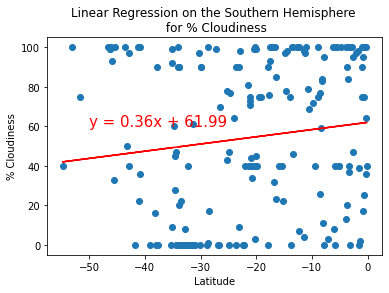

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

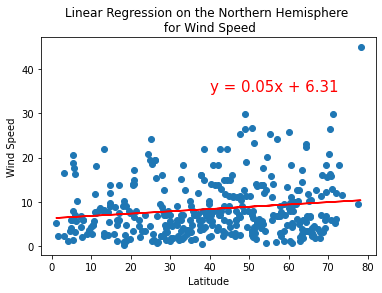

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

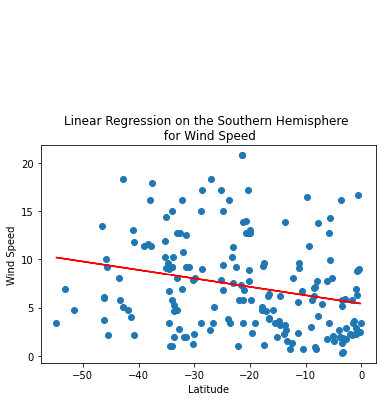

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))